In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

palette = sns.color_palette()

# plt.rcParams["axes.facecolor"] = "lightgrey"
# plt.rcParams["axes.edgecolor"] = "white"
# plt.rcParams["axes.grid"] = True
# plt.rcParams["grid.alpha"] = 1
# plt.rcParams["grid.color"] = "#cccccc"
# plt.rcParams["grid.linestyle"] = "--"
# plt.rcParams["savefig.pad_inches"] = 0.2

sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()

sns.mpl.rc("figure", figsize=(16, 6))

import src.read_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = src.read_data.get_atm_df()
df.head()

,ATM1,ATM2,ATM3,ATM4,ATM5,ATM6,ATM7,ATM8,ATM9
2017-01-01,0,18200,100,46690,930,1400,0,117730,0
2017-01-02,31950,8790,10580,48820,5870,31120,14210,85920,11410
2017-01-03,18800,3620,15550,25520,2750,41870,20660,88720,14850
2017-01-04,16180,3820,8010,30290,3520,37180,13400,85080,10440
2017-01-05,39100,1590,14690,21680,0,40280,17940,84110,9410


# Train-Test split

In [3]:
col1 = ['ATM2', 'ATM4', 'ATM5', 'ATM8']
col2 = ['ATM1', 'ATM3', 'ATM6', 'ATM7', 'ATM9']
col1, col2

(['ATM2', 'ATM4', 'ATM5', 'ATM8'], ['ATM1', 'ATM3', 'ATM6', 'ATM7', 'ATM9'])

In [4]:
_df = df[col1]
df_train, df_test = _df[:'2019-09-30'], _df['2019-10-01':]
df_train.shape, df_test.shape

((1003, 4), (31, 4))

In [10]:
model = AutoReg(df_train['ATM2'], 1)
results1 = model.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   ATM2   No. Observations:                 1003
Model:                     AutoReg(1)   Log Likelihood              -10791.053
Method:               Conditional MLE   S.D. of innovations          11505.446
Date:                Sun, 13 Feb 2022   AIC                          21588.107
Time:                        13:57:58   BIC                          21602.836
Sample:                    01-02-2017   HQIC                         21593.704
                         - 09-30-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4456.0556    552.397      8.067      0.000    3373.377    5538.734
ATM2.L1        0.7929      0.019     41.140      0.000       0.755       0.831
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2612           +0.0000j            1.2612            0.0000
-----------------------------------------------------------------------------
"""

history
2019-09-24    10230
2019-09-25     7600
2019-09-26    14070
2019-09-27    16650
2019-09-28    22570
2019-09-29    11270
2019-09-30     3920
Freq: D, Name: ATM2, dtype: int64
 predicted=7852.036835, expected=1300.000000 
 predicted=6363.035864, expected=2540.000000 
 predicted=9328.518006, expected=8700.000000 
 predicted=13834.021799, expected=7630.000000 
 predicted=11627.196328, expected=9010.000000 
 predicted=9140.401636, expected=10770.000000 
 predicted=7689.486184, expected=3640.000000 
 predicted=4280.414803, expected=7380.000000 
 predicted=7954.956530, expected=4800.000000 
 predicted=6686.806843, expected=3650.000000 
 predicted=7230.213635, expected=4260.000000 
 predicted=7278.038392, expected=9600.000000 
 predicted=9168.892751, expected=13980.000000 
 predicted=10773.475936, expected=15300.000000 
 predicted=11779.959299, expected=8850.000000 
 predicted=7704.672803, expected=2530.000000 
 predicted=4664.589136, expected=3640.000000 
 predicted=6280.044013, expec

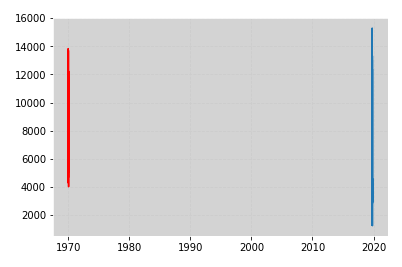

In [23]:
model = AutoReg(df_train['ATM2'], lags=7)
model_fit = model.fit()
window = 7
coef = model_fit.params
history = df_train['ATM2'][df_train.shape[0] - window:]
print('history')
print(history)
history = [history[i] for i in range(len(history))]
predictions = []
for t in range(len(df_test['ATM2'])):
    length = len(history)
    lag = [history[i] for i in range(length - window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d + 1] * lag[window - d - 1]
    obs = df_test['ATM2'][t]
    predictions.append(yhat)
    history.append(obs)
    print(" predicted=%f, expected=%f " % (yhat, obs))

rmse = np.sqrt(mean_squared_error(df_test['ATM2'], predictions))
print(" Test RMSE: %.3f " % rmse)
# plot
plt.plot(df_test['ATM2'])
plt.plot(predictions, color="red")
plt.show()


In [22]:
model = AutoReg(df_train['ATM2'], 31)
results2 = model.fit(cov_type="HC0")

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   ATM2   No. Observations:                 1003
Model:                    AutoReg(31)   Log Likelihood              -10264.047
Method:               Conditional MLE   S.D. of innovations           9328.048
Date:                Sun, 13 Feb 2022   AIC                          20594.095
Time:                        14:24:01   BIC                          20755.114
Sample:                    02-01-2017   HQIC                         20655.378
                         - 09-30-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1271.6261    429.767      2.959      0.003     429.297    2113.955
ATM2.L1        0.4634      0.049      9.407      0.000       0.367       0.560
ATM2.L2        0.0507      0.053      0.962      0.336      -0.053       0.154
ATM2.L3        0.1685      0.051      3.306      0.001       0.069       0.268
ATM2.L4       -0.0250      0.045     -0.552      0.581      -0.114       0.064
ATM2.L5        0.0427      0.044      0.965      0.335      -0.044       0.129
ATM2.L6        0.0922      0.040      2.281      0.023       0.013       0.172
ATM2.L7        0.0607      0.043      1.396      0.163      -0.025       0.146
ATM2.L8       -0.0101      0.045     -0.227      0.820      -0.097       0.077
ATM2.L9        0.0107      0.039      0.274      0.784      -0.066       0.087
ATM2.L10      -0.0470      0.042     -1.131      0.258      -0.128       0.034
ATM2.L11       0.0142      0.050      0.286      0.775      -0.083       0.111
ATM2.L12      -0.0167      0.046     -0.362      0.718      -0.107       0.074
ATM2.L13       0.1042      0.040      2.629      0.009       0.027       0.182
ATM2.L14       0.1297      0.043      3.008      0.003       0.045       0.214
ATM2.L15      -0.0140      0.042     -0.331      0.741      -0.097       0.069
ATM2.L16      -0.0443      0.040     -1.102      0.270      -0.123       0.034
ATM2.L17       0.0147      0.039      0.378      0.706      -0.061       0.091
ATM2.L18      -0.0469      0.035     -1.331      0.183      -0.116       0.022
ATM2.L19      -0.0440      0.039     -1.136      0.256      -0.120       0.032
ATM2.L20       0.0548      0.037      1.486      0.137      -0.017       0.127
ATM2.L21       0.1203      0.039      3.064      0.002       0.043       0.197
ATM2.L22       0.0283      0.042      0.676      0.499      -0.054       0.110
ATM2.L23      -0.1128      0.042     -2.717      0.007      -0.194      -0.031
ATM2.L24      -0.0260      0.044     -0.588      0.556      -0.113       0.061
ATM2.L25      -0.0085      0.045     -0.189      0.850      -0.096       0.079
ATM2.L26       0.0310      0.041      0.757      0.449      -0.049       0.111
ATM2.L27      -0.0624      0.037     -1.686      0.092      -0.135       0.010
ATM2.L28       0.1978      0.041      4.853      0.000       0.118       0.278
ATM2.L29      -0.0929      0.042     -2.211      0.027      -0.175      -0.011
ATM2.L30      -0.0547      0.039     -1.405      0.160      -0.131       0.022
ATM2.L31      -0.0369      0.039     -0.957      0.338      -0.112       0.039
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0307           -0.0000j            1.0307           -0.0000
AR.2             1.0484           -0.0000j            1.0484           -0.0000
AR

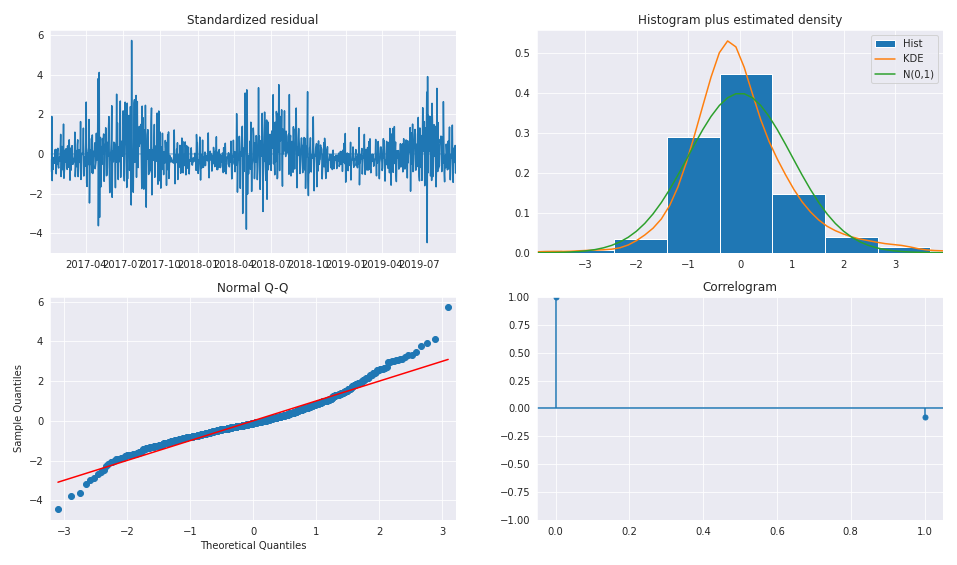

In [23]:
fig = plt.figure(figsize=(16,9))
fig = results1.plot_diagnostics(fig=fig, lags=1)

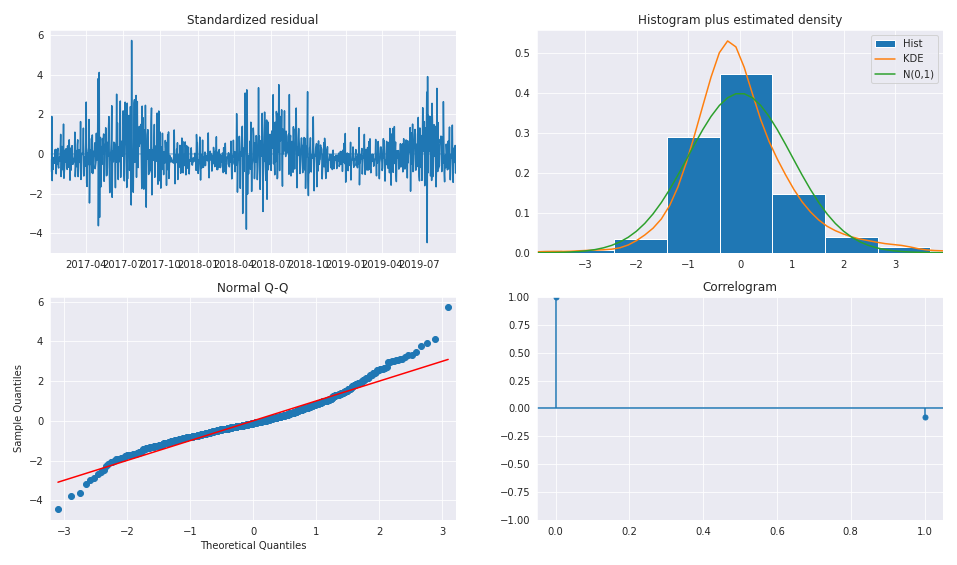

In [15]:
fig = plt.figure(figsize=(16,9))
fig = results2.plot_diagnostics(fig=fig, lags=1)